# 1. INTRODUCTION TO OUR DATASET

Files Description:

1. Customers.csv
○ CustomerID: Unique identifier for each customer.
○ CustomerName: Name of the customer.
○ Region: Continent where the customer resides.
○ SignupDate: Date when the customer signed up.


2. Products.csv
○ ProductID: Unique identifier for each product.
○ ProductName: Name of the product.
○ Category: Product category.
○ Price: Product price in USD.


3. Transactions.csv
○ TransactionID: Unique identifier for each transaction.
○ CustomerID: ID of the customer who made the transaction.
○ ProductID: ID of the product sold.
○ TransactionDate: Date of the transaction.
○ Quantity: Quantity of the product purchased.
○ TotalValue: Total value of the transaction.
○ Price: Price of the product sold.


In [13]:
# importing required libs

import numpy as np
import pandas as pd




# customer data 



In [14]:
#load the dataset
customer_df = pd.read_csv("Customers.csv")

In [15]:
# check few records of the dataset
customer_df.head(15)


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
5,C0006,Brittany Palmer,South America,2024-01-07
6,C0007,Paul Graves,Asia,2022-06-18
7,C0008,David Li,North America,2024-01-13
8,C0009,Joy Clark,Europe,2023-08-14
9,C0010,Aaron Cox,Europe,2022-12-15


In [16]:
#shape of the dataset
customer_df.shape

#200 row and 4 colums

(200, 4)

In [17]:
# check the basic info of the dataset(not null values count )
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [18]:
#checking if any duplicates
print(f' Is there any duplicate in the Summary DataFrame? {customer_df.duplicated().values.any()}.')

 Is there any duplicate in the Summary DataFrame? False.


In [19]:
customer_df.describe()
# can see 4 unique regions

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [20]:
# check the  unique values 0f region
customer_df['Region'].unique()

array(['South America', 'Asia', 'North America', 'Europe'], dtype=object)

# 1. shows number of customers from each region

In [21]:

customer_df['Region'].value_counts()

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

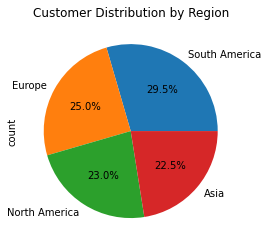

In [56]:
import matplotlib.pyplot as plt

customer_df['Region'].value_counts().plot(kind='pie',autopct='%1.1f%%',title='Customer Distribution by Region')
plt.show()


# 2.NUMBER OF CUSTOMERS SIGNEUP IN EACH YEAR

In [ ]:
# signup value counts
# shows number of customers signup on that date
customer_df['SignupDate'].value_counts()

In [23]:
customer_df['SignupYear'] = pd.to_datetime(customer_df['SignupDate']).dt.year

# Count of customers by year
signup_trend = customer_df['SignupYear'].value_counts().sort_index()
print(signup_trend)


SignupYear
2022    64
2023    57
2024    79
Name: count, dtype: int64


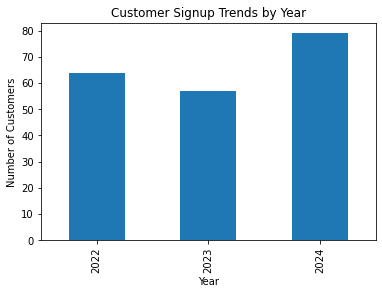

In [57]:


signup_trend.plot(kind='bar', title='Customer Signup Trends by Year')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.show()


# Products data

In [25]:
#load the dataset
products_df = pd.read_csv("Products.csv")

In [26]:
# check few records of the dataset
products_df.head(15)


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
5,P006,ActiveWear Rug,Home Decor,121.32
6,P007,SoundWave Cookbook,Books,420.15
7,P008,BookWorld Bluetooth Speaker,Electronics,146.85
8,P009,BookWorld Wall Art,Home Decor,325.01
9,P010,ComfortLiving Smartwatch,Electronics,350.13


In [27]:
#shape of the dataset
products_df.shape

#100 row and 4 colums

(100, 4)

In [28]:
# check the basic info of the dataset(not null values count )
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [29]:
#checking if any duplicates
print(f' Is there any duplicate in the Summary DataFrame? {products_df.duplicated().values.any()}.')

 Is there any duplicate in the Summary DataFrame? False.


In [30]:
products_df.describe()


,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [31]:
# check the  unique values 0f Category
unique_category=products_df['Category'].unique()
print(unique_category)

['Books' 'Electronics' 'Home Decor' 'Clothing']


In [32]:
# catogery value counts
# shows count of each catogery
category_counts=products_df['Category'].value_counts()
category_counts

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64

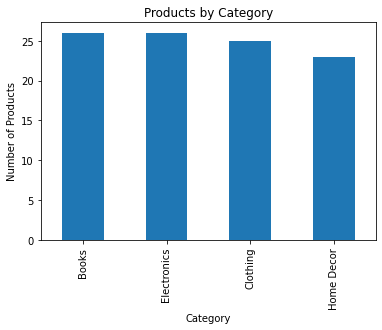

In [33]:
# Visualize category counts
category_counts.plot(kind='bar', title='Products by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

In [34]:
# check the  unique values 0f ProductName
products_df['ProductName'].unique()

array(['ActiveWear Biography', 'ActiveWear Smartwatch',
       'ComfortLiving Biography', 'BookWorld Rug', 'TechPro T-Shirt',
       'ActiveWear Rug', 'SoundWave Cookbook',
       'BookWorld Bluetooth Speaker', 'BookWorld Wall Art',
       'ComfortLiving Smartwatch', 'SoundWave Desk Lamp',
       'ComfortLiving Headphones', 'BookWorld Smartwatch',
       'ActiveWear Jacket', 'HomeSense Headphones',
       'ActiveWear Running Shoes', 'ActiveWear Textbook',
       'ComfortLiving Mystery Book', 'ComfortLiving Sweater',
       'SoundWave Rug', 'HomeSense Wall Art', 'ActiveWear Cookware Set',
       'SoundWave Bluetooth Speaker', 'SoundWave Headphones',
       'HomeSense Desk Lamp', 'TechPro Headphones', 'ActiveWear Cookbook',
       'BookWorld Cookbook', 'HomeSense T-Shirt', 'ActiveWear T-Shirt',
       'BookWorld Jacket', 'SoundWave Smartwatch', 'TechPro Vase',
       'TechPro Smartwatch', 'SoundWave Mystery Book',
       'ComfortLiving Smartphone', 'ActiveWear Headphones',
       'SoundW

In [35]:
# ProductName value counts
# shows count of each ProductName
products_df['ProductName'].value_counts()

ProductName
ActiveWear Smartwatch         4
SoundWave Headphones          4
BookWorld Biography           3
TechPro T-Shirt               3
SoundWave Cookbook            3
                             ..
BookWorld Jacket              1
ComfortLiving Smartphone      1
SoundWave T-Shirt             1
ComfortLiving Cookware Set    1
SoundWave Laptop              1
Name: count, Length: 66, dtype: int64

In [36]:
#find unique products in each catogery

category_products=products_df.groupby("Category")["ProductName"].unique()
category_products

Category
Books          [ActiveWear Biography, ComfortLiving Biography...
Clothing       [TechPro T-Shirt, ActiveWear Jacket, ActiveWea...
Electronics    [ActiveWear Smartwatch, BookWorld Bluetooth Sp...
Home Decor     [BookWorld Rug, ActiveWear Rug, BookWorld Wall...
Name: ProductName, dtype: object

# 3. Top and Bottom Priced Products
Identify the most expensive and cheapest products.

In [37]:
top_priced_products = products_df.sort_values('Price', ascending=False).head(10)
print("Top Priced Products:")
print(top_priced_products)

print()


bottom_priced_products = products_df.sort_values('Price', ascending=True).head(10)
print("Bottom Priced Products:")
print(bottom_priced_products)


Top Priced Products:
   ProductID               ProductName     Category   Price
74      P075          TechPro Textbook        Books  497.76
31      P032        BookWorld Cookbook        Books  488.63
44      P045         SoundWave T-Shirt     Clothing  481.78
16      P017       ActiveWear Textbook        Books  469.77
36      P037      SoundWave Smartwatch  Electronics  459.86
40      P041  ComfortLiving Smartphone  Electronics  456.28
82      P083     ActiveWear Smartwatch  Electronics  455.72
22      P023   ActiveWear Cookware Set   Home Decor  454.53
63      P064   HomeSense Running Shoes     Clothing  452.42
93      P094    HomeSense Cookware Set   Home Decor  447.34

Bottom Priced Products:
   ProductID               ProductName     Category  Price
55      P056      SoundWave Smartwatch  Electronics  16.08
43      P044  ActiveWear Running Shoes     Clothing  18.82
13      P014         ActiveWear Jacket     Clothing  26.26
72      P073      ComfortLiving Laptop  Electronics  26.99

#  Transaction data

In [38]:
#load the dataset
Transactions_df = pd.read_csv("Transactions.csv")

In [39]:
# check few records of the dataset
Transactions_df.head(15)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
5,T00442,C0188,P067,2024-12-26 14:40:03,1,300.68,300.68
6,T00490,C0195,P067,2024-11-24 11:49:48,3,902.04,300.68
7,T00536,C0008,P067,2024-09-22 06:13:59,1,300.68,300.68
8,T00564,C0157,P067,2024-12-07 17:57:40,3,902.04,300.68
9,T00631,C0130,P067,2024-05-14 23:14:59,2,601.36,300.68


In [40]:
#shape of the dataset
Transactions_df.shape

(1000, 7)

In [41]:
# check the basic info of the dataset(not null values count )
Transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [42]:
#checking if any duplicates
print(f' Is there any duplicate in the Summary DataFrame? {products_df.duplicated().values.any()}.')

 Is there any duplicate in the Summary DataFrame? False.


In [43]:
Transactions_df.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [44]:
Transactions_df.nunique()

TransactionID      1000
CustomerID          199
ProductID           100
TransactionDate    1000
Quantity              4
TotalValue          369
Price               100
dtype: int64

# 4. WHAT IS THE TOTAL REVENUE GENERATED ?

In [45]:
revenue = Transactions_df['Price'].sum()
print(f"The total revenue is: {revenue}")

The total revenue is: 272554.07


# MERGE customer & Transaction DATAFRAMES.



# 5.customer who have signedup but have not made transaction yet(Customer Churn)

In [46]:
merged_df01 = pd.merge(left = customer_df, right = Transactions_df,how = 'left', on = 'CustomerID' )

merged_df01.head()

,CustomerID,CustomerName,Region,SignupDate,SignupYear,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,2022,T00015,P054,2024-01-19 03:12:55,2.0,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,2022,T00932,P022,2024-09-17 09:01:18,3.0,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,2022,T00085,P096,2024-04-08 00:01:00,2.0,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,2022,T00445,P083,2024-05-07 03:11:44,2.0,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,2022,T00436,P029,2024-11-02 17:04:16,3.0,1300.92,433.64


In [58]:
# Filter customers who haven't made any transactions
customers_no_transactions = merged_df01[merged_df01['TransactionID'].isna()]

# Select only the customer-related columns
customers_no_transactions = customers_no_transactions[['CustomerID', 'CustomerName', 'Region', 'SignupDate']]

# Display the result
print(customers_no_transactions)


    CustomerID   CustomerName Region  SignupDate
904      C0180  Amy Carpenter   Asia  2023-10-25


# 6.total value and price of each region.

In [48]:
merged_df = pd.merge(left = customer_df, right = Transactions_df,how = 'inner', on = 'CustomerID' )

merged_df.head()

,CustomerID,CustomerName,Region,SignupDate,SignupYear,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,2022,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,2022,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,2022,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,2022,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,2022,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64


In [49]:
regional_profit = merged_df.groupby('Region')[[
    'TotalValue',
    'Price'
]].sum()

regional_profit.sort_values(
    by = 'TotalValue', 
    ascending = False
)

,TotalValue,Price
Region,,
South America,219352.56,84211.82
Europe,166254.63,64483.15
North America,152313.40,64719.07
Asia,152074.97,59140.03


# Total spending,number of transactions made , number of unique products buyed by each customer

In [60]:
# Aggregate transactional data for customer profiles
customer_transactions = Transactions_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',       # Total spending
    'TransactionID': 'count',  # Number of transactions
    'ProductID': lambda x: x.nunique()  # Unique products purchased
}).rename(columns={
    'TotalValue': 'TotalSpending',
    'TransactionID': 'TransactionCount',
    'ProductID': 'UniqueProducts'
}).reset_index()

In [61]:
print(customer_transactions)

    CustomerID  TotalSpending  TransactionCount  UniqueProducts
0        C0001        3354.52                 5               5
1        C0002        1862.74                 4               4
2        C0003        2725.38                 4               4
3        C0004        5354.88                 8               8
4        C0005        2034.24                 3               3
..         ...            ...               ...             ...
194      C0196        4982.88                 4               3
195      C0197        1928.65                 3               3
196      C0198         931.83                 2               2
197      C0199        1979.28                 4               4
198      C0200        4758.60                 5               5

[199 rows x 4 columns]


# MERGE Products & Transaction DATAFRAMES.

In [50]:
merged_df1 = pd.merge(left = products_df, right = Transactions_df,how = 'inner', on = 'ProductID' )

merged_df1.head()

,ProductID,ProductName,Category,Price_x,TransactionID,CustomerID,TransactionDate,Quantity,TotalValue,Price_y
0,P001,ActiveWear Biography,Books,169.3,T00088,C0019,2024-01-30 17:23:03,2,338.6,169.3
1,P001,ActiveWear Biography,Books,169.3,T00314,C0024,2024-09-24 17:15:16,4,677.2,169.3
2,P001,ActiveWear Biography,Books,169.3,T00428,C0071,2024-08-02 08:13:23,2,338.6,169.3
3,P001,ActiveWear Biography,Books,169.3,T00433,C0036,2024-05-05 05:01:18,2,338.6,169.3
4,P001,ActiveWear Biography,Books,169.3,T00449,C0191,2024-12-12 12:17:38,1,169.3,169.3


# 7. WHAT IS THE MOST POPULAR CATEGORY SOLD?.

In [51]:
most_sold = merged_df1.groupby('Category')[[
    'Quantity',
    'Price_y'
]].sum()

most_sold.sort_values(
    by = 'Quantity', 
    ascending = False
)

,Quantity,Price_y
Category,,
Books,681,75742.08
Home Decor,639,58928.83
Electronics,627,73335.39
Clothing,590,64547.77


# 8. WHAT IS THE MOST POPULAR PRODUCT SOLD?.

In [52]:
most_sold1 = merged_df1.groupby('ProductName')[[
    'Quantity',
    'Price_y'
]].sum()

most_sold1.sort_values(
    by = 'Quantity', 
    ascending = False
)

,Quantity,Price_y
ProductName,,
ActiveWear Smartwatch,100,15977.27
SoundWave Headphones,97,10025.71
HomeSense Desk Lamp,81,5338.32
ActiveWear Rug,79,8255.08
SoundWave Cookbook,78,5971.30
...,...,...
HomeSense Headphones,18,1271.44
SoundWave Laptop,16,2099.51
SoundWave Jacket,16,1774.05


# 9. WHAT ARE THE TOP CATEGORIES  IN TERMS OF REVENUE?.
AND TOTAL REVENUE GENERATED PER CATEGORY


In [53]:
top_categories = merged_df1.groupby('Category')[[
    'Quantity',
    'Price_y'
]].sum()

top_categories.sort_values(
    by = 'Price_y',
    ascending = False
)

,Quantity,Price_y
Category,,
Books,681,75742.08
Electronics,627,73335.39
Clothing,590,64547.77
Home Decor,639,58928.83


# 10. WHAT ARE THE TOP products IN TERMS OF REVENUE?.

MOST POPULAR PRODUCT IN TERMS OF SALES

In [54]:
top_products = merged_df1.groupby('ProductName')[[
    'Quantity',
    'Price_y'
]].sum()

top_products.sort_values(
    by = 'Price_y',
    ascending = False
)

,Quantity,Price_y
ProductName,,
ActiveWear Smartwatch,100,15977.27
SoundWave Headphones,97,10025.71
SoundWave Novel,58,8414.70
ActiveWear Rug,79,8255.08
BookWorld Cookbook,48,8248.99
...,...,...
ComfortLiving Desk Lamp,26,651.60
SoundWave Bluetooth Speaker,19,450.66
ComfortLiving Rug,19,447.92
